In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/heart_data.csv')
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df['height'].mean()

164.35922857142856

In [4]:
df['height'].median()

165.0

In [5]:
df['height'].mode()

,height
0,165


In [6]:
q1 = df['height'].quantile(0.25)
print("Q1 : " , q1)

q3 = df['height'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 -q1
print("IQR : ",iqr)

Q1 :  159.0
Q3 :  170.0
IQR :  11.0


<Axes: >

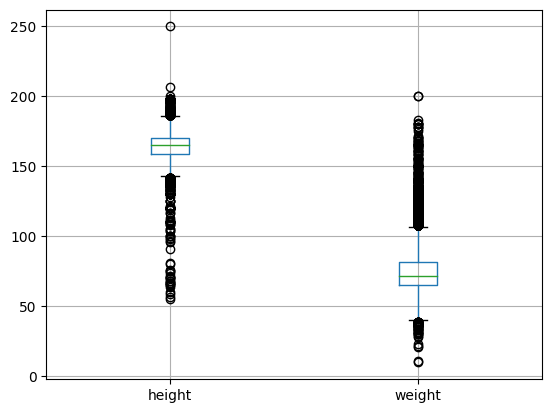

In [7]:
df.boxplot(column=['height','weight'])

In [8]:
outlier_data = {
    'gender': ["2", "1", "2", "1"],
    'height':[168, 156, 165, 178],
    'weight': [62, 85, 60, 105],
    'index': [2, 5, 2, 5]
}

outlier_df = pd.DataFrame(outlier_data)

df = pd.concat([df, outlier_df], ignore_index=True)
df

,index,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,0.0,18393.0,2,168,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1,1.0,20228.0,1,156,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2,2.0,18857.0,1,165,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0
3,3,3.0,17623.0,2,169,82.0,150.0,100.0,1.0,1.0,0.0,0.0,1.0,1.0
4,4,4.0,17474.0,1,156,56.0,100.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69999,69999,99999.0,20540.0,1,170,72.0,120.0,80.0,2.0,1.0,0.0,0.0,1.0,0.0
70000,2,NaN,NaN,2,168,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70001,5,NaN,NaN,1,156,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70002,2,NaN,NaN,2,165,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


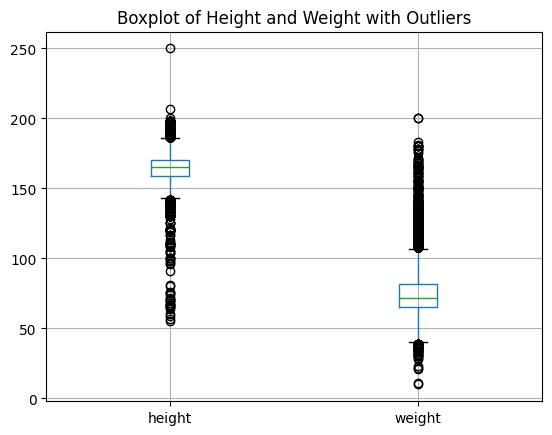

In [9]:
import matplotlib.pyplot as plt

df.boxplot(column=['height', 'weight'])
plt.title('Boxplot of Height and Weight with Outliers')
plt.show()

In [10]:
q1 =df['height'].quantile(0.25)
print("Q1 : ", q1)

q3 = df['height'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 -q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['height'] < lower_bound) | (df['height'] > upper_bound)]

print("Outlier Height:")
print(outliers)

Q1 :  159.0
Q3 :  170.0
Outlier Height:
       index       id      age gender  height  weight  ap_hi  ap_lo  \
62        62     81.0  20330.0      2     187   115.0  130.0   90.0   
76        76    105.0  20397.0      2     188   105.0  120.0   80.0   
224      224    309.0  21800.0      2      76    55.0  120.0   80.0   
249      249    343.0  18220.0      1     142    61.0  120.0   80.0   
781      781   1086.0  23301.0      1     141    60.0  120.0   80.0   
...      ...      ...      ...    ...     ...     ...    ...    ...   
69430  69430  99172.0  19040.0      1     140    52.0  150.0   80.0   
69475  69475  99226.0  19261.0      2     187    73.0  120.0   80.0   
69589  69589  99401.0  18286.0      2     192    83.0  110.0   70.0   
69784  69784  99673.0  17541.0      1     141    44.0  100.0   70.0   
69873  69873  99799.0  19736.0      2     188   108.0  130.0   80.0   

       cholesterol  gluc  smoke  alco  active  cardio  
62             1.0   1.0    0.0   1.0     1.0     0

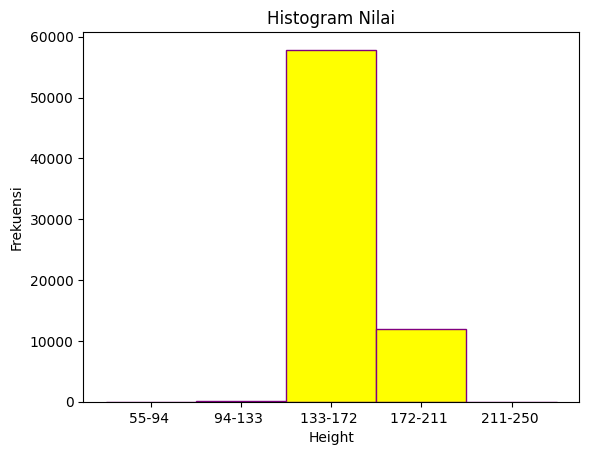

In [11]:
data_height = df["height"]

n, bins, patches = plt.hist(data_height, bins=5, color='yellow', edgecolor='purple')

plt.title('Histogram Nilai')
plt.xlabel('Height')
plt.ylabel('Frekuensi')

bin_centers = 0.5 * (bins[:-1] + bins[1:])
plt.xticks(bin_centers, ['{:.0f}-{:.0f} ' .format(bins[i], bins[i+1]) for i in range(len(bins)-1)])

plt.show()

In [12]:
outliers_condition = ((df['height'] > upper_bound) | (df['height'] < lower_bound)) | (df['weight'] < 30) | (df['weight'] > 200)

df_cleaned = df[~outliers_condition]

print(df_cleaned.tail())

       index       id      age gender  height  weight  ap_hi  ap_lo  \
69999  69999  99999.0  20540.0      1     170    72.0  120.0   80.0   
70000      2      NaN      NaN      2     168    62.0    NaN    NaN   
70001      5      NaN      NaN      1     156    85.0    NaN    NaN   
70002      2      NaN      NaN      2     165    60.0    NaN    NaN   
70003      5      NaN      NaN      1     178   105.0    NaN    NaN   

       cholesterol  gluc  smoke  alco  active  cardio  
69999          2.0   1.0    0.0   0.0     1.0     0.0  
70000          NaN   NaN    NaN   NaN     NaN     NaN  
70001          NaN   NaN    NaN   NaN     NaN     NaN  
70002          NaN   NaN    NaN   NaN     NaN     NaN  
70003          NaN   NaN    NaN   NaN     NaN     NaN  


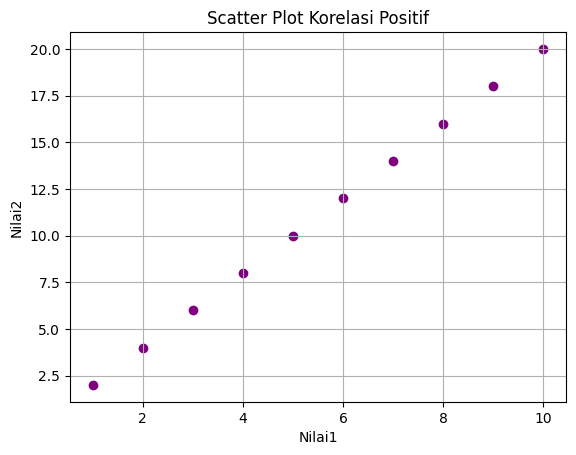

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Nilail': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Nilai2': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

df = pd.DataFrame(data)

plt.scatter(df['Nilail'], df['Nilai2'], color='purple', marker='o')

plt.title('Scatter Plot Korelasi Positif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

plt.grid(True)
plt.show()

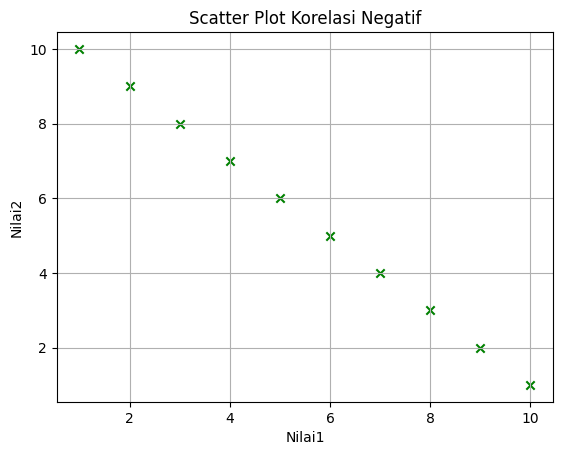

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'Nilail': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Nilai2': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}

df = pd.DataFrame(data)

plt.scatter(df['Nilail'], df['Nilai2'], color='green', marker='x')

plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Nilai1')
plt.ylabel('Nilai2')

plt.grid(True)
plt.show()